# A Video that's likely helpful

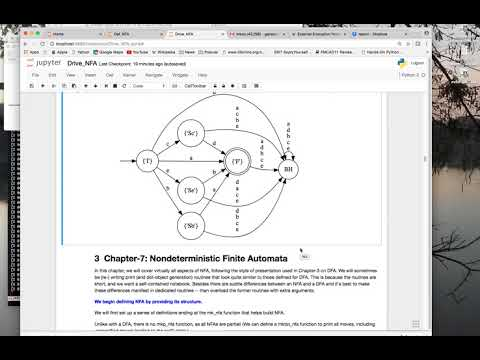

In [1]:
# This is a potentially helpful video from long ago... watch it if you've not, before.
from IPython.display import YouTubeVideo
YouTubeVideo('xjFtLF95uBc')

# Asg-3 imports 


In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accept

# Problem 1a (SV): Design an NFA for $\{0,1\}^* 1 0$ ("Ends 10")

## It will be a 3-state NFA, and name the states as I, S0, and F

### Document each line of your Jove code with a short comment


In [3]:
# SOLUTION

nfaEnds10 = md2mc('''NFA
  !! An NFA that accepts strings that end in "10".
  !! 
  !! Idea: keep the control flow at the initial state at all times while
  !!   recording the progress with two extra states.
  !! 
  !! Initial state: I
  !! Final states: {F}
  
  I :0|1-> I   !! We can treat receiving any character as "not helping"
               !!   and stay at the initial state.
  I :1-> S_1   !! Except when we get a '1', which progresses the pattern.
  
  S_1 :0-> F   !! Getting a '0' immediately after a '1' finishes the
               !! pattern.
''')


# Problem 1b (SV): Determine States in Animation

Put the above NFA in animation, and note down the set of states attained
after the DFA has seen every character in 10010. More detailed instructions follow.

## 1b(i): Execute the cell below and follow the bulleted instructions

* When the animation pane comes up, type in 10010 and click Animate

* Then click the ">|" button, which is for single-stepping

* Note down the results as you single-step, and fill answers in 1b(ii) below


In [4]:
AnimateNFA(nfaEnds10, FuseEdges=False)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

## 1b(ii) : Provide these answers based on single-stepping the animation (please provide it as a SET OF STATES - else we won't give you any points). 

## Also say whether a token dropped out of the diagram (with the move on a symbol being undefined) and whether the state reached is final. 

<!--
A Token Dropped Out / The SET of states reached is FINAL / NONE OF THESE
-->

### SET of states before consuming any of 10010 = {} 
***NONE OF THESE***

### SET of states AFTER consuming "1" and before consuming "0010"  = {I, S_1}
***NONE OF THESE***

### SET of states AFTER consuming "10" and before consuming "010"  = {I, F}
***The SET of states reached is FINAL***

### SET of states AFTER consuming "100" and before consuming "10"  = {I}
***A Token Dropped Out***

### SET of states AFTER consuming "1001" and before consuming "0"  = {I, S_1}
***NONE OF THESE***

### SET of states AFTER consuming "10010" entirely  = {I, F}
***The SET of states reached is FINAL***

# Problem 1c (SV): Convert the NFA to a DFA and answer

Convert the NFA to a DFA by the command below, and answer 1c's question below

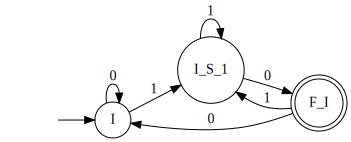

In [5]:
dotObj_dfa(nfa2dfa(nfaEnds10, STATENAME_MAXSIZE=50), STATENAME_MAXSIZE=50)

#### 1c's question-1: State DFA is in after 10010 = F_I

The state reached is final.

#### 1c's question-2: Set of states NFA is in after 10010 (last ans of 1b(ii) ) = {I, F}

The SET of states reached is FINAL.

#### Do the above match? Recall that for an NFA set of states (A,B), a DFA state may be named A_B or B_A. We use "match" in this sense.

Yes, they match (both accepting).

#### Reason that the above should match? Please provide a sentence stating when a DFA accepts and when an NFA accepts in terms of its tokens being in many states that includes a final state.

Assuming the conversion from NFA to DFA was correct, whatever the NFA accepts the DFA should also accept, vice versa. A DFA accepts a string when the string reaches one of the final states, while a NFA accepts the same string when the set that the same string's "tokens" are on include a final state.

# Problem 2 (XL): Design an NFA for $\{\varepsilon, 0\}$ 
### It will be a 2-state NFA with an IF state and a final state (call that final state "F2" )

In [6]:
nfaEps0 = md2mc('''NFA 
  !! An NFA that accepts the empty string and the string "0".
  !! 
  !! Initial state: IF
  !! Final states: {IF, F2}
  
  IF :0-> F2 !! Accept the empty string as well as '0'.
''')

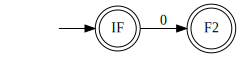

In [7]:
dotObj_nfa(nfaEps0)

# A tutorial on Concatenating NFA

Watch this video, then do Xinyi Li's question.

To watch the video separately in Youtube in large size, 
visit https://youtu.be/VWyOT1uYfIc

Otherwise just run the command below!

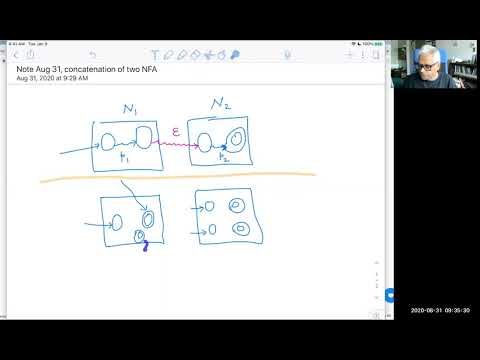

In [8]:
# NFA Concatenation
from IPython.display import YouTubeVideo
YouTubeVideo('VWyOT1uYfIc')

# Problem 2a (XL): Develop a Concatenation NFA

## Concatenate nfaEnds10 and nfaEps0 to obtain NFAEnds10Eps0

### Follow the steps in the above video.

### Describe the steps in a few bullets below, then finish the notebook code cell that defines NFAEnds10Eps0 below where space is provided for your work


# Problem 2b (XL): Show the full Concatenation NFA below


In [10]:
# Here is the resulting NFA

NFAEnds10Eps0 = md2mc('''
NFA 

!! Condition 1: A1 is the only state that connects to the Initial state (I).
!! 
!! Condition 2: T1 is can only be reached from A1
!! 
!! Condition 3: F3 can only be reached from T1
!! 
!! Condition 4: F2 can only be reached from F3
!! 
!! Condition 5: You must name the states of the NFA in this manner.

!!---- Put NFA 1's transitions below, 
!!----  after suitably renaming states to make final states non-final etc.

  I :0|1-> I
  I :1-> A1
  
  A1 :0-> T1

!!--- put the "bridge" transition below

  T1 :''-> F3

!!--- put NFA 2's transitions below, again after suitable state renamings as above

  F3 :0-> F2

''')

## Problem 2b (XL): Draw the concat NFA and convert to a DFA

... Run the THREE commands below, and then move on to answer LT's question 
... based on the results you observe from these commands


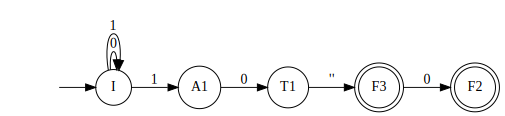

In [11]:
# command-1
# the above nfa
dotObj_nfa(NFAEnds10Eps0)

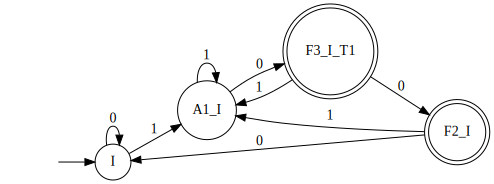

In [12]:
# command-2
# converting the above nfa to a dfa
dotObj_dfa(nfa2dfa(NFAEnds10Eps0, STATENAME_MAXSIZE=50), STATENAME_MAXSIZE=50)

In [13]:
# Let us see its internal representation -- this may give you hints for answering your question

# command-3

NFAEnds10Eps0

{'Q': {'A1', 'F2', 'F3', 'I', 'T1'},
 'Sigma': {'0', '1'},
 'Delta': {('I', '0'): {'I'},
  ('I', '1'): {'A1', 'I'},
  ('A1', '0'): {'T1'},
  ('T1', ''): {'F3'},
  ('F3', '0'): {'F2'}},
 'Q0': {'I'},
 'F': {'F2', 'F3'}}

# Problem 3 (LT): Explain the NFA2DFA algorithm

Below, you must explain the states of the DFA that resulted from converting the
NFA to DFA using subset construction. 

You must look at the results of running command-1 command-2 and command-3 in answering your question.
<!--
For each question, your answer must be of
the following form:

* Currently the NFA is in a *set* of states, say S1. That is already an E-closed state. That is where the DFA begins its operation (in the corresponding DFA state).

* Let S1 be {s11, s12} for example. (Notice my use of upper and lower cases.)

* Consider a '0' transition

* Upon a '0', s11 when to set of states S11, s12 went to set of states S12, and so on.

* I performed E-Closure of the states in S11 and that resulted in S11c. (If E-closure did not generate any new states, say "E-Closure did not generate any new state.")

* Similarly, I performed E-Closure of the states in S12 and that resulted in S12c

* Then I unioned S11c and S12c and called it S2

* S2 is now an E-closed set of states

* Thus, I arrive at a single NFA state corresponding to 
  - S1 going upon '0' to S2 (and the DFA now has a state corresponding to S2).
-->
 
## QUESTIONS FOR YOU TO ANSWER IN THE ABOVE MANNER

### Looking at the NFA NFAEnds10Eps0, why did state I arise in the DFA?

* I obtained the E-closure of the initial state `I` and that resulted in the set of states `{I}`.

* I performed E-Closure of the states in `{I}` and that resulted in `{I}`, which did not generate any new states.

* Thus, I arrive at a single NFA `{I}` and the DFA now has a state corresponding to `{I}`, which is `I`.

### Why did state A1_I arise in the DFA?

* Currently the NFA is in a set of states, `{I}`. That is already an E-closed state. That is where the DFA begins its operation (in the corresponding DFA state, `I`).

* Consider a '1' transition. Upon a '1', state `I` went to set of states `{I, A1}`.

* I performed E-Closure of the states in `{I, A1}` and that resulted in `{I, A1}`, which did not generate any new states.

* Thus, I arrive at a single NFA state corresponding to "`{I}` going upon '1' to `{I, A1}` (and the DFA now has a state corresponding to that, `A1_I`)."

### Why did F3_I_T1 arise (mention E-closure steps)

* Currently the NFA is in a set of states, `{I, A1}`. That is already an E-closed state. That is where the DFA begins its operation (in the corresponding DFA state, `A1_I`).

* Consider a '0' transition. Upon a '0', state `I` went to set of states `{I}`, while state `A1` went to set of states `{T1}`.

* I performed E-Closure of the states `{I}` and that resulted in `{I}`, which did not generate any new states.

* Similarly, I performed E-Closure of the states in `{T1}` and that resulted in `{T1, F3}`, where `F3` was generated by the E-closure.

* Then I unioned `{I}` and `{T1, F3}` and got `{I, T1, F3}`, which is now an E-closed set of states.

* Thus, I arrive at a single NFA state corresponding to "`{I, T1}` going upon '0' to `{I, T1, F3}` (and the DFA now has a state corresponding to that, `F3_I_T1`)."

### Explain in detail why A1_I went upon a '0' to F3_I_T1 (include all the E-closure steps)

* To find the destination states upon a '0', we need to use the "Epsilon-Move-Epsilon" method, meaning that we need to (1) perform the E-closure on the starting states, (2) get the destination for each of the states in the E-closure upon a '0', and (3) perform the E-closure on the resulting set of destinations:
  - Our starting state was `A1_I` which corresponded to the states `{A1, I}` in the NFA.
  - Performing E-closure on the states `{A1, I}` yielded `{A1, I}` (which didn't generate any new states).
  - Upon a '0', the state `I` went to `{I}`, while the state `A1` went to `{F3}`; taking the union yielded `{F3, I}`.
  - Performing E-closure on the states `{F3, I}` yielded `{F3, I, T1}`, which corresponded to the state `F3_I_T1` in the DFA.

* Therefore, `A1_I` went to `F3_I_T1` upon a '0'.

### Why did F2_I arise?

* Currently the NFA is in a set of states, `{I, F3, T1}`. That is already an E-closed state. That is where the DFA begins its operation (in the corresponding DFA state, `F3_I_T1`).

* Consider a '0' transition. Upon a '0', state `I` went to set of states `{I}`, while state `F3` went to set of states `{F2}`. `T1` upon a '0' didn't have a place to go, so it dropped out.

* I performed E-Closure of the states `{I}` and that resulted in `{I}`, which did not generate any new states.

* Similarly, I performed E-Closure of the states in `{F2}` and that resulted in `{F2}`, which did not generate any new states either.

* Then I unioned `{I}` and `{F2}` and got `{I, F2}`, which is now an E-closed set of states.

* Thus, I arrive at a single NFA state corresponding to "`{I, F3, T1}` going upon '0' to `{I, F2}` (and the DFA now has a state corresponding to that, `F2_I`)."

# Problem 4 (AR): Brzozowski's minimization

This is to tell you a DFA minimization algorithm that shows you that a bloated DFA can be minimized simply by following these steps, as explained in Section 7.7. In this problem, you will practice these steps on an initial bloated DFA given to you.

The steps are these:

1. Reverse the given DFA, say DFA_bloated, to obtain an NFA called NFA1 (use the rev_dfa function)

2. Determinize NFA1 to obtain a DFA called DFA2

3. Reverse DFA2 to obtain another NFA, say NFA2

4. Determinize NFA2 to obtain the final minimized DFA, say DFA_min

The problem asks you to apply this procedure to minimize an initial DFA_bloated



In [14]:
# This is a slight variant of Figure 6.7's bloated DFA 

DFA_bloated = md2mc('''

DFA

IS1: a -> Temp
IS1: b -> FS3

Temp: a -> FS2
Temp: b -> FS3

FS2: a -> S4
FS2: b -> S5

FS3: a -> S5
FS3: b -> S4

S4: a|b -> FS6
S5: a|b -> FS6

FS6: a|b -> FS6

''')

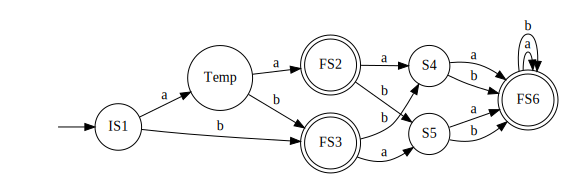

In [15]:
dotObj_dfa(DFA_bloated)

## Problem 4.1:  Show the result of reversing the above DFA

In [16]:
help(rev_dfa)

Help on function rev_dfa in module jove.Def_NFA:

rev_dfa(D)
    In : D = a partially consistent DFA without any unreachable states.
    Out: A consistent NFA whose language is D's language reversed.



### The reverse invocation

In [17]:
# Reverse DFA_bloated here

NFA1 =  rev_dfa(DFA_bloated)

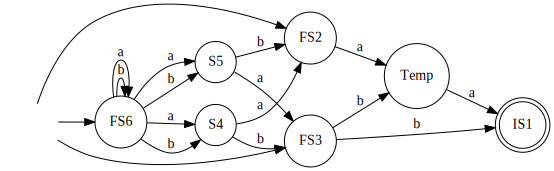

In [18]:
dotObj_nfa(NFA1)

## Problem 4.2: Check that NFA1 is indeed the reverse of DFA_bloated by checking one string

Point out that "aabba" is in DFA_bloated's language but its reversal (i.e. "abbaa") is in NFA1's language

### Which path does abbaa take in being accepted by NFA1 ?

<!--.... LIST THE PATH AS A SEQUENCE OF STATES, HERE ....-->

* Starting from State {FS2, FS3, FS6}

* The next state after 'a' is {FS6, S4, S5, Temp}

* The next state after 'b' is {FS2, FS3, FS6, S4, S5}

* The next state after 'b' is {FS2, FS3, FS6, S4, S5, Temp, IS1}

* The next state after 'a' is {FS2, FS3, FS6, S4, S5, Temp, IS1}

* The next state after 'a' is {FS2, FS3, FS6, S4, S5, Temp, IS1} (This must be the final state!)


## Problem 4.3: Determinize NFA1 to obtain DFA2

In [19]:
help(nfa2dfa)

Help on function nfa2dfa in module jove.Def_NFA:

nfa2dfa(N, STATENAME_MAXSIZE=20)
    In : N (consistent NFA), and optional STATENAME_MAXSIZE
         for the generated DFA states
    Out: A consistent DFA that is language-equivalent to N.



In [20]:
DFA2 = nfa2dfa(NFA1)

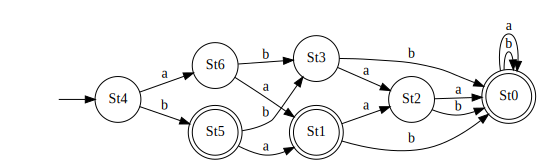

In [21]:
dotObj_dfa(DFA2)

## Problem 4.4: Reverse DFA2 to obtain NFA3

In [22]:
NFA3 = rev_dfa(DFA2)

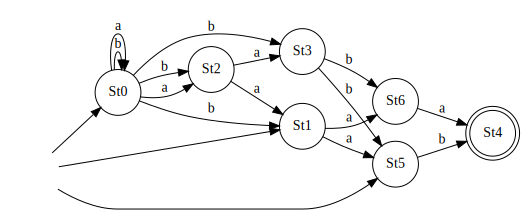

In [23]:
dotObj_nfa(NFA3)

## Problem 4.5:  One more determinization, and we are done minimizing


In [24]:
DFA_min = nfa2dfa(NFA3)

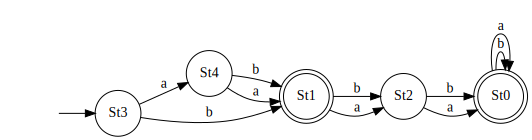

In [25]:
dotObj_dfa(DFA_min)

# Check that DFA_min and DFA_bloated have the same language but are not isomorphic

In [26]:
help(langeq_dfa)

Help on function langeq_dfa in module jove.Def_DFA:

langeq_dfa(D1, D2, gen_counterex=False)
    Given consistent and total DFAs D1 and D2,
    check whether they are language-equivalent. 
    gen_counterex is a flag that triggers the
     printing of a counter-example showing the
     pairs that were marched in tandem till a
     difference was found.
     
    Two DFAs are language-equivalent if they 
    accept the same set of strings. We determine
    this through a joint depth-first walk of the 
    two DFAs until we detect a difference (return
    False then) or all pairs of states have been
    visited (return True then).



In [27]:
help(iso_dfa)

Help on function iso_dfa in module jove.Def_DFA:

iso_dfa(D1, D2)
    Given consistent and total DFAs D1 and D2,
    check whether they are isomorphic. Two DFAs
    are isomorphic if they have the same number
    of states and are language-equivalent. (One would
    then be able to match-up state for state and transition
    for transition.)



In [28]:
#...SHOW THAT DFA_bloated and DFA_min HAVE THE SAME LANGUAGE ...
print(langeq_dfa(DFA_bloated, DFA_min))

True


In [29]:
#...SHOW THAT DFA_bloated and DFA_min are NOT isomorphic ...
print(iso_dfa(DFA_bloated, DFA_min))

False


##  But we indeed are minimal as shown by the number of states of the standard DFA min algorithm

In [30]:
DFA_min_alt = min_dfa(DFA_bloated)

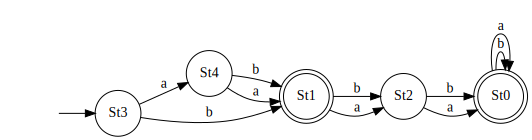

In [31]:
dotObj_dfa(DFA_min)

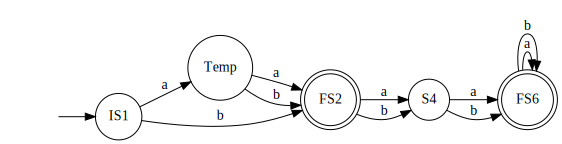

In [32]:
dotObj_dfa(DFA_min_alt)

In [33]:
help(iso_dfa)

Help on function iso_dfa in module jove.Def_DFA:

iso_dfa(D1, D2)
    Given consistent and total DFAs D1 and D2,
    check whether they are isomorphic. Two DFAs
    are isomorphic if they have the same number
    of states and are language-equivalent. (One would
    then be able to match-up state for state and transition
    for transition.)



In [34]:
#...SHOW THAT DFA_min and DFA_min_alt are isomorphic...
print(iso_dfa(DFA_min, DFA_min_alt))

True


# END of demonstration that DFA minimization can be done in two different ways

## Here are some notes to understand Brzozowski's method

* If you are given a DFA "D1", a minimal DFA for "reverse(D1)" is obtained by "reverse followed by determinize"

* But since we are interested in the minimal DFA for "D1" (and not reverse(D1)), we do these steps again!

* Hence the algorithm becomes "reverse THEN determinize THEN reverse THEN determinize"